Import libraries

In [1]:
import util
import numpy as np
import cv2
import matplotlib.pyplot as plt
import stepic
from PIL import Image, ImageOps

Load the image

In [12]:
img_kyoto = cv2.cvtColor(cv2.imread("../images/kyoto-2.bmp"), cv2.COLOR_BGR2GRAY)
img_kyoto.shape

(300, 400)

In [2]:
img_kyoto = Image.open('../images/kyoto-2.bmp')
img_kyoto.size

(400, 300)

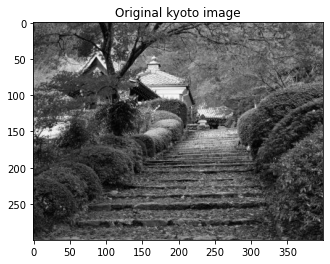

In [13]:
plt.imshow(img_kyoto, cmap = 'gray')
plt.title("Original kyoto image")
plt.show()

Define mask

In [14]:
np_mask = np.array([[1, 0], [0, 1]])

Testing purpose

In [3]:
img_example = np.random.randint(0, high = 256, size = 16).reshape(4, 4)
img_example

array([[168,  99,  75,  64],
       [111, 142, 136, 231],
       [241, 227,  81, 213],
       [117, 111,  41,  34]])

Testing base libraries

In [4]:
util.calculate_count_groups(img_example, -np_mask)

Image window
[[168  99]
 [111 142]]
Flipped version
[[167.  99.]
 [111. 141.]]
Image window
[[ 75  64]
 [136 231]]
Flipped version
[[ 76.  64.]
 [136. 232.]]
Image window
[[241 227]
 [117 111]]
Flipped version
[[242. 227.]
 [117. 112.]]
Image window
[[ 81 213]
 [ 41  34]]
Flipped version
[[ 82. 213.]
 [ 41.  33.]]


(1, 1)

In [5]:
util.calculate_count_groups(img_example, np_mask)

Image window
[[168  99]
 [111 142]]
Flipped version
[[169.  99.]
 [111. 143.]]
Image window
[[ 75  64]
 [136 231]]
Flipped version
[[ 74.  64.]
 [136. 230.]]
Image window
[[241 227]
 [117 111]]
Flipped version
[[240. 227.]
 [117. 110.]]
Image window
[[ 81 213]
 [ 41  34]]
Flipped version
[[ 80. 213.]
 [ 41.  35.]]


(1, 1)

Message to be encoded

In [5]:
msg_stego = "photons awesome"*1000
len(msg_stego)

15000

Experimentation

In [6]:
r_m, s_m, r_neg_m, s_neg_m = [], [], [], []

In [15]:
print(util.calculate_count_groups(img_kyoto, -np_mask))
print(util.calculate_count_groups(img_kyoto, np_mask))

(655, 28194)
(644, 28220)


In [8]:
for i in range(100):
    img_encoded = stepic.encode(img_kyoto, msg_stego[:150*(i+1)].encode('utf-8'))
    np_img_encoded = np.array(img_encoded)
    temp1, temp2 = util.calculate_count_groups(np_img_encoded, np_mask)
    r_m.append(temp1); s_m.append(temp2)
    temp1, temp2 = util.calculate_count_groups(np_img_encoded, -np_mask)
    r_neg_m.append(temp1); s_neg_m.append(temp2)

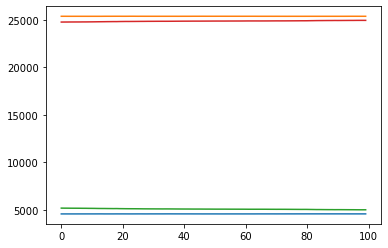

In [11]:
plt.plot(range(len(r_m)), r_m)
plt.plot(range(len(s_m)), s_m)
plt.plot(range(len(r_neg_m)), r_neg_m)
plt.plot(range(len(s_neg_m)), s_neg_m)